In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8580 non-null   int64  
 1   id                           8580 non-null   int64  
 2   member_id                    8580 non-null   int64  
 3   loan_amnt                    8580 non-null   int64  
 4   funded_amnt                  8580 non-null   int64  
 5   funded_amnt_inv              8580 non-null   float64
 6   term                         8580 non-null   object 
 7   int_rate                     8580 non-null   float64
 8   installment                  8580 non-null   float64
 9   grade                        8580 non-null   object 
 10  sub_grade                    8580 non-null   object 
 11  emp_title                    8009 non-null   object 
 12  emp_length                   8268 non-null   object 
 13  home_ownership    

# Define Target

In [4]:
df.loan_status.value_counts(normalize=True)*100

Fully Paid            74.475524
Charged Off           15.489510
Current                9.627040
Late (31-120 days)     0.221445
In Grace Period        0.093240
Late (16-30 days)      0.069930
Default                0.023310
Name: loan_status, dtype: float64

In [5]:
bad = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['bad_loan'] = np.where(df['loan_status'].isin(bad), 1, 0)

In [6]:
df['bad_loan'].value_counts(normalize=True)*100

0    84.265734
1    15.734266
Name: bad_loan, dtype: float64

In [7]:
df.drop('loan_status', axis=1, inplace=True)

# Cleansing Data

In [8]:
df_copy = df.copy()

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8580 non-null   int64  
 1   id                           8580 non-null   int64  
 2   member_id                    8580 non-null   int64  
 3   loan_amnt                    8580 non-null   int64  
 4   funded_amnt                  8580 non-null   int64  
 5   funded_amnt_inv              8580 non-null   float64
 6   term                         8580 non-null   object 
 7   int_rate                     8580 non-null   float64
 8   installment                  8580 non-null   float64
 9   grade                        8580 non-null   object 
 10  sub_grade                    8580 non-null   object 
 11  emp_title                    8009 non-null   object 
 12  emp_length                   8268 non-null   object 
 13  home_ownership    

## Check Corellation

In [10]:
corr_matrix = df_copy.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

<ipython-input-10-e6225f7ca92c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr().abs()
<ipython-input-10-e6225f7ca92c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee']

In [11]:
df_copy.drop(to_drop_hicorr, axis=1, inplace=True)

## Check unique value

In [12]:
df_copy.select_dtypes(include='object').nunique()

term                      2
grade                     7
sub_grade                35
emp_title              7083
emp_length               11
home_ownership            3
verification_status       3
issue_d                   5
pymnt_plan                1
url                    8580
desc                   4874
purpose                  13
title                  3580
zip_code                710
addr_state               45
earliest_cr_line        459
initial_list_status       1
last_pymnt_d             52
next_pymnt_d              2
last_credit_pull_d       54
application_type          1
dtype: int64

remove features that have a very high unique value (high cardinality) and features that have only one unique value

In [13]:
df_copy.drop(['application_type', 'title', 'desc', 'url', 'emp_title'], axis=1, inplace=True)

In [14]:
df_copy.select_dtypes(exclude='object').nunique()

Unnamed: 0                     8580
loan_amnt                       618
int_rate                         69
annual_inc                     1502
dti                            2543
delinq_2yrs                       7
inq_last_6mths                    9
mths_since_last_delinq           86
mths_since_last_record           71
open_acc                         32
pub_rec                           3
revol_bal                      7323
revol_util                     1019
total_acc                        62
out_prncp                       861
total_rec_late_fee              300
recoveries                     1027
last_pymnt_amnt                7829
collections_12_mths_ex_med        1
mths_since_last_major_derog       0
policy_code                       1
annual_inc_joint                  0
dti_joint                         0
verification_status_joint         0
acc_now_delinq                    1
tot_coll_amt                      0
tot_cur_bal                       0
open_acc_6m                 

In [15]:
df_copy.drop(['policy_code'], axis=1, inplace=True)

In [ ]:
df_copy.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [18]:
df_copy.drop(['zip_code' , 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m'
    , 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util'
    , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'sub_grade'], axis=1, inplace=True)

In [19]:
for col in df_copy.select_dtypes(include='object').columns.tolist():
    print(df_copy[col].value_counts(normalize=True)*100)
    print('\n')

 36 months    66.689977
 60 months    33.310023
Name: term, dtype: float64


B    31.130536
A    27.855478
C    18.356643
D    11.969697
E     7.226107
F     2.762238
G     0.699301
Name: grade, dtype: float64


10+ years    26.548137
2 years      10.099178
3 years       9.240445
< 1 year      9.143687
4 years       8.901790
5 years       8.865506
1 year        7.498791
6 years       7.293179
7 years       5.224964
8 years       3.942912
9 years       3.241413
Name: emp_length, dtype: float64


RENT        46.631702
MORTGAGE    45.699301
OWN          7.668998
Name: home_ownership, dtype: float64


Verified           39.160839
Not Verified       30.652681
Source Verified    30.186480
Name: verification_status, dtype: float64


Dec-11    26.421911
Nov-11    26.013986
Oct-11    24.685315
Sep-11    22.389277
Aug-11     0.489510
Name: issue_d, dtype: float64


n    100.0
Name: pymnt_plan, dtype: float64


debt_consolidation    51.899767
credit_card           15.617716
other                 

delete features that are dominated by only one value

In [20]:
df_copy.drop('pymnt_plan', axis=1, inplace=True)

In [21]:
df_copy.drop(['issue_d', 'addr_state', 'last_pymnt_d'], axis=1, inplace=True)

In [22]:
df_copy['emp_length'] = df_copy['emp_length'].replace({'10+ years': 10, '2 years': 2, '3 years':3, '4 years':4,
                                         '5 years':5, '6 years':6, '7 years':7, '8 years': 8,
                                         '9 years':9, '1 year':1, '< 1 year':0.5})

In [23]:
df_copy['term'] = pd.to_numeric(df_copy['term'].str.replace(' months', ''))
df_copy['term'] = df_copy['term'].replace({36: 0, 60: 1})

In [24]:
df_copy.drop(['earliest_cr_line', 'last_credit_pull_d'], axis=1, inplace=True)

In [25]:
df_copy['grade'] = df_copy['grade'].replace({'A': 1, 'B': 2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})

In [26]:
df_copy['initial_list_status'] = df_copy['initial_list_status'].replace({'f':0,'w':1})

In [27]:
df_copy['collections_12_mths_ex_med'] =df_copy['collections_12_mths_ex_med'].replace({3:2,4:2,5:2,16:2,20:2})

In [28]:
df_copy['verification_status'] = df_copy['verification_status'].replace({'Verified':1,'Not Verified':0,'Source Verified':2})

# Handle Missing Value

In [29]:
check_missing = df_copy.isnull().sum() * 100 / df_copy.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_major_derog    100.000000
tot_coll_amt                   100.000000
tot_cur_bal                    100.000000
total_rev_hi_lim               100.000000
mths_since_last_record          95.675991
next_pymnt_d                    89.965035
mths_since_last_delinq          68.344988
emp_length                       3.636364
revol_util                       0.034965
initial_list_status              0.011655
out_prncp                        0.011655
total_rec_late_fee               0.011655
recoveries                       0.011655
last_pymnt_amnt                  0.011655
collections_12_mths_ex_med       0.011655
acc_now_delinq                   0.011655
dtype: float64

drop features that have a missing value above 15%

In [30]:
df_copy.drop(['mths_since_last_record', 'mths_since_last_delinq', 'next_pymnt_d', 'tot_cur_bal', 'tot_coll_amt'], axis=1, inplace=True)

In [31]:
check_missing = df_copy.isnull().sum() * 100 / df_copy.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_major_derog    100.000000
total_rev_hi_lim               100.000000
emp_length                       3.636364
revol_util                       0.034965
initial_list_status              0.011655
out_prncp                        0.011655
total_rec_late_fee               0.011655
recoveries                       0.011655
last_pymnt_amnt                  0.011655
collections_12_mths_ex_med       0.011655
acc_now_delinq                   0.011655
dtype: float64

In [ ]:
df_copy['last_pymnt_d'].fillna(0, inplace=True)
df_copy['emp_length'].fillna(0, inplace=True)
df_copy['revol_util'].fillna(0, inplace=True)
df_copy['collections_12_mths_ex_med'].fillna(0, inplace=True)
df_copy['delinq_2yrs'].fillna(0, inplace=True)
df_copy['inq_last_6mths'].fillna(0, inplace=True)
df_copy['open_acc'].fillna(0, inplace=True)
df_copy['pub_rec'].fillna(0, inplace=True)
df_copy['total_acc'].fillna(0, inplace=True)
df_copy['acc_now_delinq'].fillna(0, inplace=True)
df_copy['annual_inc'].fillna(df_copy['annual_inc'].mean(), inplace=True)

In [35]:
df_copy.drop(['mths_since_last_major_derog', 'total_rev_hi_lim'], axis=1, inplace=True)

In [37]:
df_copy.head(2)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_loan
0,5000,0,10.65,2,10.0,RENT,24000.0,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,0.0,0.00,171.62,0.0,0.0,0
1,2500,1,15.27,3,0.5,RENT,30000.0,2,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,0.0,117.08,119.66,0.0,0.0,1


In [38]:
df_copy['initial_list_status'].fillna(0, inplace=True)
df_copy['out_prncp'].fillna(0, inplace=True)
df_copy['total_rec_late_fee'].fillna(0, inplace=True)
df_copy['recoveries'].fillna(0, inplace=True)
df_copy['last_pymnt_amnt'].fillna(0, inplace=True)

In [39]:
df_copy.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
bad_loan                      0
dtype: int64

# Encoding

In [40]:
cat_cols = [col for col in df_copy.select_dtypes(include='object').columns.tolist()]
cat_cols

['home_ownership', 'purpose']

In [41]:
for i in ['home_ownership','purpose']:
  onehots = pd.get_dummies(df_copy[i],prefix='enc')
  df_copy=df_copy.join(onehots)

In [42]:
onehots.head()

,enc_car,enc_credit_card,enc_debt_consolidation,enc_home_improvement,enc_house,enc_major_purchase,enc_medical,enc_moving,enc_other,enc_renewable_energy,enc_small_business,enc_vacation,enc_wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [43]:
df_copy = df_copy.drop(['purpose','home_ownership'],axis=1)

In [44]:
df_copy.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_loan,enc_MORTGAGE,enc_OWN,enc_RENT,enc_car,enc_credit_card,enc_debt_consolidation,enc_home_improvement,enc_house,enc_major_purchase,enc_medical,enc_moving,enc_other,enc_renewable_energy,enc_small_business,enc_vacation,enc_wedding
0,5000,0,10.65,2,10.0,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,0.00,0.00,171.62,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2500,1,15.27,3,0.5,30000.0,2,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,0.00,117.08,119.66,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,0,15.96,3,10.0,12252.0,0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,0.00,0.00,649.91,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000,0,13.49,3,10.0,49200.0,2,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,16.97,0.00,357.48,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000,1,12.69,2,1.0,80000.0,2,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,0.0,766.9,0.00,0.00,67.79,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [45]:
X = df_copy.drop('bad_loan',axis=1)
y = df_copy['bad_loan']

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=1, stratify = y)

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
data_scale = ['loan_amnt', 'int_rate', 'emp_length',
       'annual_inc',
       'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'revol_bal',
       'total_acc','out_prncp', 'initial_list_status',
       'recoveries',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med']

X_train[data_scale] = scaler.fit_transform(X_train[data_scale])
X_test[data_scale] = scaler.transform(X_test[data_scale])

In [49]:
X_test_copy = X_test.copy()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = (model.predict_proba(X_test)[:,1]).astype('float')
    y_pred_proba_train = (model.predict_proba(X_train)[:,1]).astype('float')


    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train))

    score_roc_auc = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc_score (crossval train): '+ str(score_roc_auc['train_score'].mean()))
    print('roc_auc_score (crossval test): '+ str(score_roc_auc['test_score'].mean()))

    score_acc = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy_score (crossval train): '+ str(score_acc['train_score'].mean()))
    print('accuracy_score (crossval test): '+ str(score_acc['test_score'].mean()))

    score_prec = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('precision_score (crossval train): '+ str(score_prec['train_score'].mean()))
    print('presicion_score (crossval test): '+ str(score_prec['test_score'].mean()))

    score_rec = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall_score (crossval train): '+ str(score_rec['train_score'].mean()))
    print('recall_score (crossval test): '+ str(score_rec['test_score'].mean()))

    score_f1 = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)
    print('f1_score (crossval train): '+ str(score_f1['train_score'].mean()))
    print('f1_score (crossval test): '+ str(score_f1['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
eval_classification(lr)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.95
Precision (Test Set): 0.97
Precision (Train Set): 0.95
Recall (Test Set): 0.75
Recall (Train Set): 0.74
F1-Score (Test Set): 0.85
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.97
roc_auc_score (crossval train): 0.9624798294144767
roc_auc_score (crossval test): 0.9619158854566876
accuracy_score (crossval train): 0.9625874125874126
accuracy_score (crossval test): 0.9625874125874126
precision_score (crossval train): 0.9785994806580873
presicion_score (crossval test): 0.978579930316605
recall_score (crossval train): 0.7792592592592592
recall_score (crossval test): 0.7792592592592593
f1_score (crossval train): 0.8676237006265254
f1_score (crossval test): 0.8675601821639389


In [60]:
lr = LogisticRegression(class_weight='balanced',random_state=5)
lr.fit(X_train,y_train)
eval_classification(lr)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.93
Precision (Test Set): 0.76
Precision (Train Set): 0.75
Recall (Test Set): 0.86
Recall (Train Set): 0.86
F1-Score (Test Set): 0.81
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.97
roc_auc_score (crossval train): 0.9703210965114494
roc_auc_score (crossval test): 0.9694544336867988
accuracy_score (crossval train): 0.9427156177156176
accuracy_score (crossval test): 0.9435897435897436
precision_score (crossval train): 0.7985692483349787
presicion_score (crossval test): 0.8041951529461879
recall_score (crossval train): 0.8512962962962964
recall_score (crossval test): 0.8488888888888889
f1_score (crossval train): 0.8239577398970223
f1_score (crossval test): 0.8257982038977005


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 5, class_weight='balanced')
dt.fit(X_train,y_train)
eval_classification(dt)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 1.00
Precision (Test Set): 0.88
Precision (Train Set): 1.00
Recall (Test Set): 0.85
Recall (Train Set): 1.00
F1-Score (Test Set): 0.87
F1-Score (Test Set): 1.00
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
roc_auc_score (crossval train): 1.0
roc_auc_score (crossval test): 0.912445059167051
accuracy_score (crossval train): 1.0
accuracy_score (crossval test): 0.9524475524475525
precision_score (crossval train): 1.0
presicion_score (crossval test): 0.8462813976183694
recall_score (crossval train): 1.0
recall_score (crossval test): 0.8540740740740741
f1_score (crossval train): 1.0
f1_score (crossval test): 0.8497219765887275


In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
eval_classification(xgb)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.98
Precision (Train Set): 1.00
Recall (Test Set): 0.85
Recall (Train Set): 1.00
F1-Score (Test Set): 0.91
F1-Score (Test Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc_score (crossval train): 1.0
roc_auc_score (crossval test): 0.9793909123508018
accuracy_score (crossval train): 1.0
accuracy_score (crossval test): 0.971911421911422
precision_score (crossval train): 1.0
presicion_score (crossval test): 0.9703519468181667
recall_score (crossval train): 1.0
recall_score (crossval test): 0.8474074074074075
f1_score (crossval train): 1.0
f1_score (crossval test): 0.9045856536452093


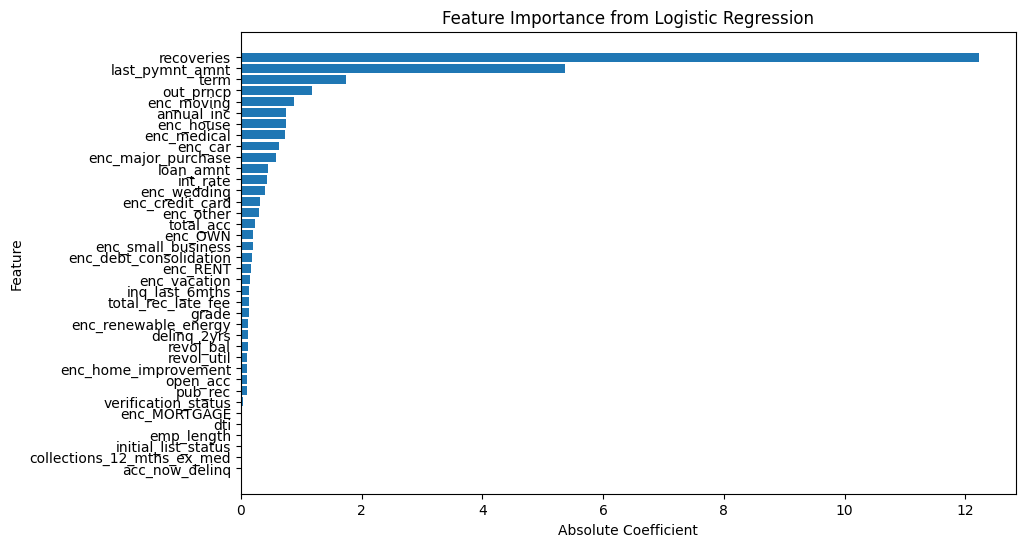

In [58]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Mengambil koefisien dari model Logistic Regression
coef = lr.coef_[0]

# Mengambil nama fitur dari dataset (asumsi: X_train adalah DataFrame)
feature_names = X_train.columns

# Membuat DataFrame untuk menyimpan fitur penting beserta koefisien
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Mengurutkan DataFrame berdasarkan nilai koefisien secara absolut
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient')

# Menampilkan bar plot untuk fitur penting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()


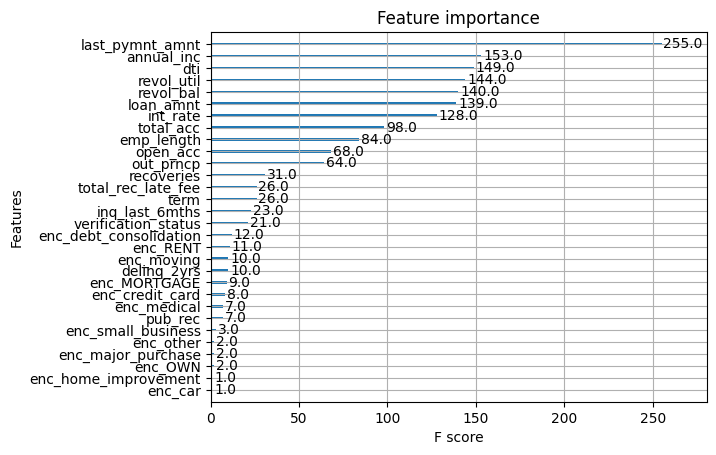

In [59]:
from xgboost import plot_importance

plot_importance(xgb)
plt.show()

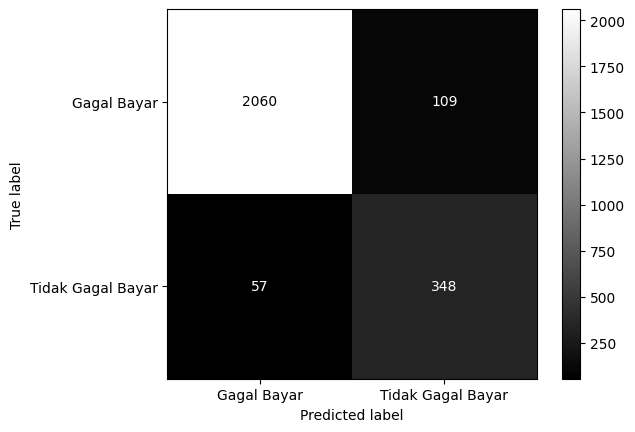

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred=lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Gagal Bayar','Tidak Gagal Bayar'])

cm_display.plot(cmap='gray',values_format='')
plt.show()

In [64]:
y_test.value_counts()

0    2169
1     405
Name: bad_loan, dtype: int64

**Menggunakan Data Test**

Tanpa menggunakan machine learning customer yang gagal bayar adalah 405 orang dari 2169 (18.69% dari total customer).

Setelah menggunakan machine learning menjadi 109 dari 2169 (5.02% dari total customer)

In [65]:
X_test_copy

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,enc_MORTGAGE,enc_OWN,enc_RENT,enc_car,enc_credit_card,enc_debt_consolidation,enc_home_improvement,enc_house,enc_major_purchase,enc_medical,enc_moving,enc_other,enc_renewable_energy,enc_small_business,enc_vacation,enc_wedding
194,0.137536,0,-1.364822,1,1.323163,-0.084411,2,-0.435581,-0.290753,0.146899,-0.582465,-0.213723,-0.131406,-0.635732,2.115637,0.0,-0.294987,-0.172604,-0.161402,-0.206513,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3778,0.375291,1,0.064855,2,0.478301,-0.498223,1,-1.210366,-0.290753,0.146899,-0.347634,-0.213723,-0.545066,-0.719192,-0.147612,0.0,-0.294987,-0.172604,-0.161402,1.437465,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2788,0.256413,1,1.374411,4,-0.929804,4.152239,2,-0.806263,-0.290753,-0.826916,0.591693,-0.213723,2.814851,1.537859,2.749347,0.0,-0.294987,-0.172604,-0.161402,2.310740,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3133,-0.100219,0,-0.415629,2,-1.352235,0.487044,2,-1.865136,1.928133,-0.826916,-0.347634,-0.213723,-0.822485,-1.484847,-0.962382,0.0,-0.294987,-0.172604,-0.161402,1.733823,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3860,-0.872922,0,-0.415629,2,-0.084941,-0.596750,1,-0.078572,-0.290753,1.120714,1.061356,-0.213723,-0.026857,0.021063,1.119807,0.0,-0.294987,-0.172604,-0.161402,-0.586653,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,0.375291,1,0.436995,3,1.041542,-0.239847,2,-0.128705,-0.290753,0.146899,3.174840,-0.213723,-0.713866,-1.521134,2.477757,0.0,-0.294987,-0.172604,-0.161402,0.556230,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6690,-0.884810,0,-0.827810,1,-0.929804,-0.458813,0,0.245015,-0.290753,1.120714,0.826524,-0.213723,-0.862783,-1.521134,-0.328672,0.0,-0.294987,-0.172604,-0.161402,-0.586738,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
551,-0.100219,0,1.143590,4,-0.929804,0.487044,0,-0.443177,-0.290753,0.146899,-0.112802,-0.213723,0.064882,1.291107,-0.328672,0.0,-0.294987,-0.172604,-0.161402,0.779864,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1468,0.613046,1,0.672527,3,1.323163,0.427928,1,2.250342,-0.290753,0.146899,-0.112802,-0.213723,0.535786,0.293215,1.391397,0.0,-0.294987,-0.172604,-0.161402,0.471096,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [66]:
y_pred = lr.predict(X_test)

X_test_pred = pd.DataFrame({'y_true':y_test, 'y_pred':y_pred})
X_test_result = pd.concat([X_test_copy,X_test_pred],axis=1)

In [67]:
X_test_result.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,enc_MORTGAGE,enc_OWN,enc_RENT,enc_car,enc_credit_card,enc_debt_consolidation,enc_home_improvement,enc_house,enc_major_purchase,enc_medical,enc_moving,enc_other,enc_renewable_energy,enc_small_business,enc_vacation,enc_wedding,y_true,y_pred
194,0.137536,0,-1.364822,1,1.323163,-0.084411,2,-0.435581,-0.290753,0.146899,-0.582465,-0.213723,-0.131406,-0.635732,2.115637,0.0,-0.294987,-0.172604,-0.161402,-0.206513,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3778,0.375291,1,0.064855,2,0.478301,-0.498223,1,-1.210366,-0.290753,0.146899,-0.347634,-0.213723,-0.545066,-0.719192,-0.147612,0.0,-0.294987,-0.172604,-0.161402,1.437465,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2788,0.256413,1,1.374411,4,-0.929804,4.152239,2,-0.806263,-0.290753,-0.826916,0.591693,-0.213723,2.814851,1.537859,2.749347,0.0,-0.294987,-0.172604,-0.161402,2.310740,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3133,-0.100219,0,-0.415629,2,-1.352235,0.487044,2,-1.865136,1.928133,-0.826916,-0.347634,-0.213723,-0.822485,-1.484847,-0.962382,0.0,-0.294987,-0.172604,-0.161402,1.733823,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3860,-0.872922,0,-0.415629,2,-0.084941,-0.596750,1,-0.078572,-0.290753,1.120714,1.061356,-0.213723,-0.026857,0.021063,1.119807,0.0,-0.294987,-0.172604,-0.161402,-0.586653,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [68]:
pre_bayar = X_test_result[X_test_result['y_true']==1]
pre_gagal = X_test_result[X_test_result['y_true'] == 0]
after_gagal = X_test_result[(X_test_result['y_true'] == 0) & (X_test_result['y_pred'] == 1)]
after_bayar = X_test_result[(X_test_result['y_true'] == 1) & (X_test_result['y_pred'] == 1)]
gain_loss = X_test_result[(X_test_result['y_true'] == 1) & (X_test_result['y_pred'] == 0)]

In [69]:
pre_revenue = pre_bayar['loan_amnt'].sum()
pre_loss = pre_gagal['loan_amnt'].sum()
after_revenue = after_bayar['loan_amnt'].sum()
after_loss = after_gagal['loan_amnt'].sum()

In [72]:
print('Total revenue before using machine learning :', pre_revenue - pre_loss)
print('Total revenue after using machine learning :', after_revenue - after_loss)
print('The total advantage of using machine learning :', (after_revenue - after_loss)-(pre_revenue - pre_loss))

Total revenue before using machine learning : 67.4606220418251
Total revenue after using machine learning : 135.44448743060633
The total advantage of using machine learning : 67.98386538878123
